# geopandas: paquete para manipulación y análisis de datos vectoriales

## Descripción general

[Geopandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [pandas](http://pandas.pydata.org/) para incorporar objetos geométricos (puntos, líneas, polígonos, etc), como los utilizados en el modelo vectorial. Se apoya en las bibliotecas [Fiona](https://github.com/Toblerity/Fiona/) para acceder a los datos, [Shapely](https://github.com/Toblerity/Shapely/) para realizar las operaciones geométricas y [matplotlib](https://matplotlib.org/) para graficación.

Geopandas implementa dos estructuras principales de datos:

- [GeoSeries](http://geopandas.org/data_structures.html#geoseries): es un vector en el que cada elemento es un conjunto de una o varias geometrías correspondientes a una observación. Por ejemplo, un polígono que representa una provincia, una línea que representa una carretera o un punto que representa una edificación.
- [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe): es una estructura tabular (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números). El conjunto de geometrías se implementa a través de GeoSeries.

## Instalación

Puede instalarse con `pip`, `conda` o `mamba`, desde la línea de comandos del sistema operativo. Solo es necesario hacerlo de una forma.

```
# Con pip:
pip install geopandas

# Con conda:
conda install geopandas -c conda-forge

# Con mamba:
mamba install geopandas -c conda-forge
```

**Para Google Colab, se recomienda la siguiente secuencia de comandos:**

```
# Instalación de libspatialindex-dev y rtree
# Debe realizarse antes de la instalación de geopandas
!apt install libspatialindex-dev
!pip install --upgrade rtree

# Instalación de geopandas y otros módulos módulos
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade mapclassify
!pip install --upgrade descartes
```

## Carga

In [1]:
# Carga de la biblioteca pandas con el alias pd
import pandas as pd

# Carga de geopandas
import geopandas as gpd

In [2]:
# Versión de geopandas
gpd.__version__

'1.0.1'

## Operaciones básicas

Seguidamente, se describen y ejemplifican algunas de las funciones básicas de geopandas.

### read_file() - carga de datos

In [3]:
# Lectura de datos de países de Natural Earth,
# uno de los conjuntos de datos de ejemplo incluídos en geopandas

paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Visualización de los datos
paises

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

### info() - información general sobre un conjunto de datos

In [4]:
paises.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


### describe() - información estadística

In [5]:
paises.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.324346e+07,4.934739e+05
std,1.513543e+08,2.019326e+06
min,1.400000e+02,1.600000e+01
25%,3.301000e+06,1.346900e+04
50%,1.019232e+07,5.040000e+04
75%,3.182530e+07,2.619210e+05
max,1.397715e+09,2.143323e+07


### head(), tail(), sample() - despliegue de filas de un conjunto de datos

In [6]:
# Primeros 5 registros
paises.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
# Últimos 10 registros
paises.tail(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
167,5096159.0,Africa,Somaliland,SOL,17836,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
168,44269594.0,Africa,Uganda,UGA,35165,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736..."
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891..."
170,3301000.0,Europe,Bosnia and Herz.,BIH,20164,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
171,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [8]:
# 5 registros seleccionados aleatoriamente
paises.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
65,20321378.0,Africa,Burkina Faso,BFA,15990,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127..."
147,108116615.0,Asia,Philippines,PHL,376795,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
87,39309783.0,Asia,Iraq,IRQ,234094,"POLYGON ((39.19547 32.16101, 38.79234 33.37869..."


### Selección de columnas

Las columnas que se despliegan en un geodataframe pueden especificarse mediante una lista.

In [9]:
# Despliegue de las columnas con el nombre del país y su población
paises[["name", "pop_est"]]

,name,pop_est
0,Fiji,889953.0
1,Tanzania,58005463.0
2,W. Sahara,603253.0
3,Canada,37589262.0
4,United States of America,328239523.0
...,...,...
172,Serbia,6944975.0
173,Montenegro,622137.0
174,Kosovo,1794248.0
175,Trinidad and Tobago,1394973.0


### Selección de filas

In [10]:
# Países con población estimada mayor o igual a mil millones
paises[paises["pop_est"] >= 1000000000]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


### Selección de filas y columnas en la misma expresión

In [11]:
# Columnas de nombre del país y su población 
# para filas con población estimada mayor o igual a mil millones
paises.loc[paises["pop_est"] >= 1000000000, ["name", "pop_est"]]

,name,pop_est
98,India,1.366418e+09
139,China,1.397715e+09


## Operaciones de análisis

### plot() - mapeo

El método [geopandas.GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) genera un mapa de un geodataframe mediante `matplotlib`.

<Axes: >

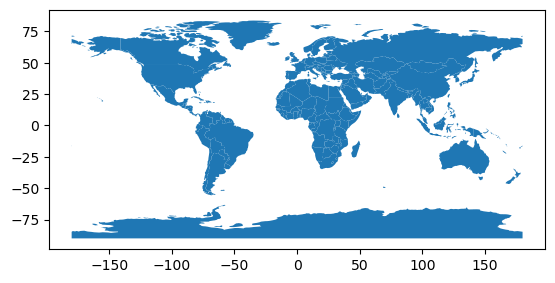

In [12]:
# Mapa básico
paises.plot()

Si se especifica una columna con el argumento `column`, el mapa se colorea de acuerdo con los valores de esa columna.

<Axes: >

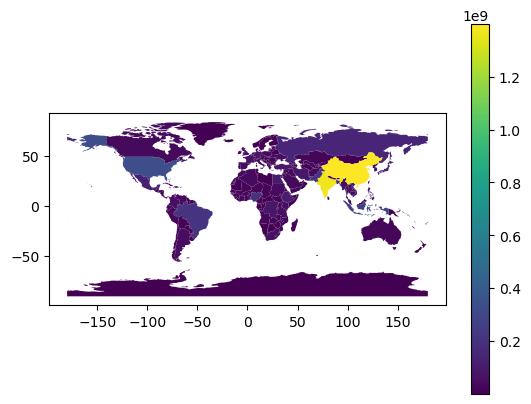

In [13]:
# Mapa de coropletas de la columna
# correspondiente al estimado de población
paises.plot(column = "pop_est", legend=True)

Mapa de coropletas con una paleta de colores del sitio [ColorBrewer](https://colorbrewer2.org/), creado por [Cynthia Brewer](https://en.wikipedia.org/wiki/Cynthia_Brewer), y un esquema de clasificación basado en [cuantiles](https://es.wikipedia.org/wiki/Cuantil).

<Axes: >

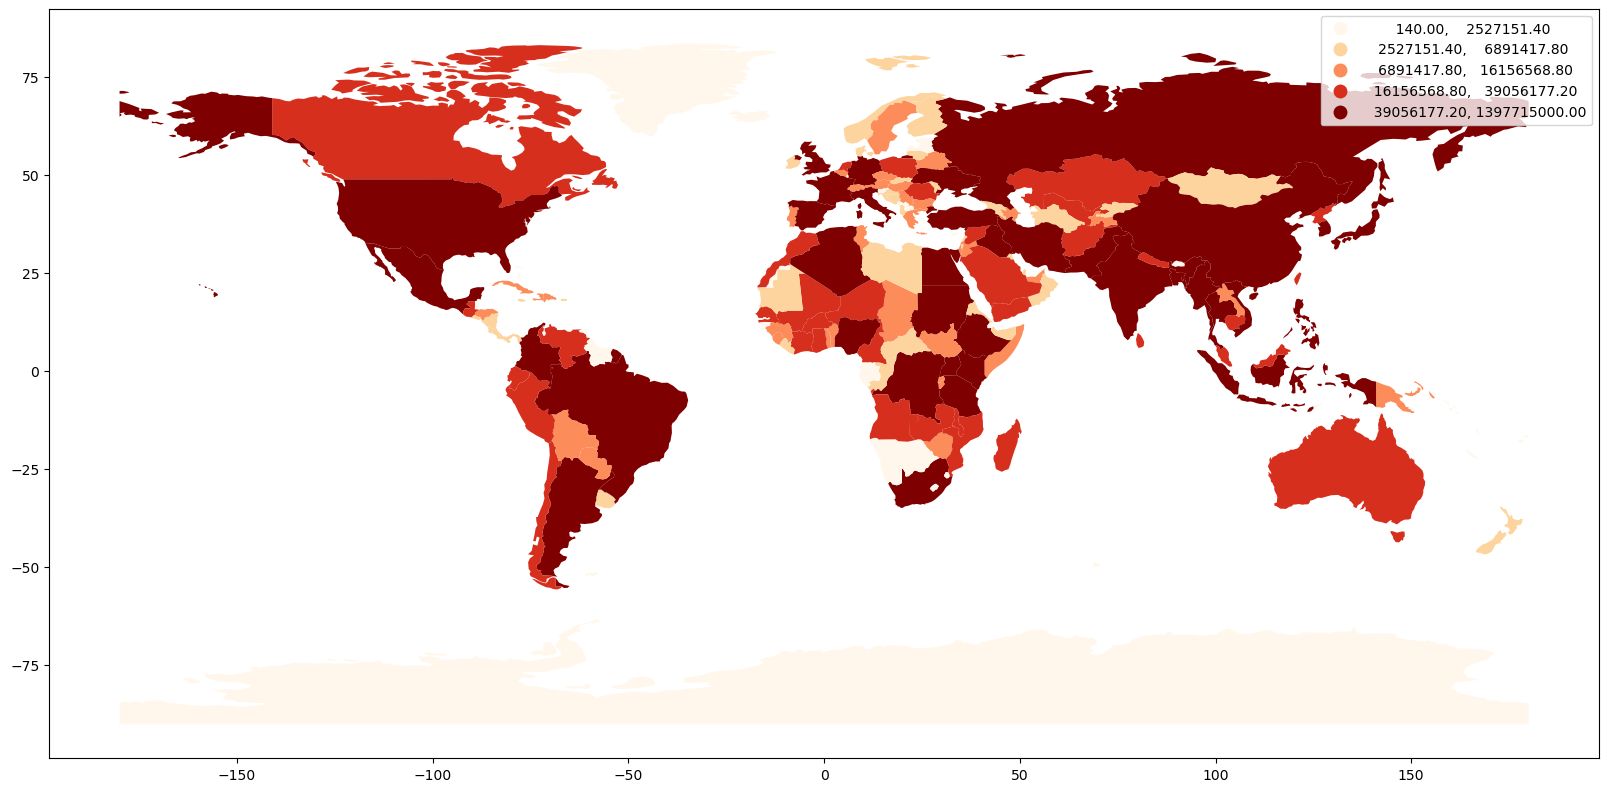

In [14]:
# Mapa de coropletas con paleta de colores y esquema de clasificación
paises.plot(column = "pop_est", 
            legend=True,
            cmap='OrRd', 
            scheme='quantiles',
            figsize=(20, 20)
            )

Mapa con múltiples capas.

/tmp/ipykernel_842223/2798752322.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


<Axes: >

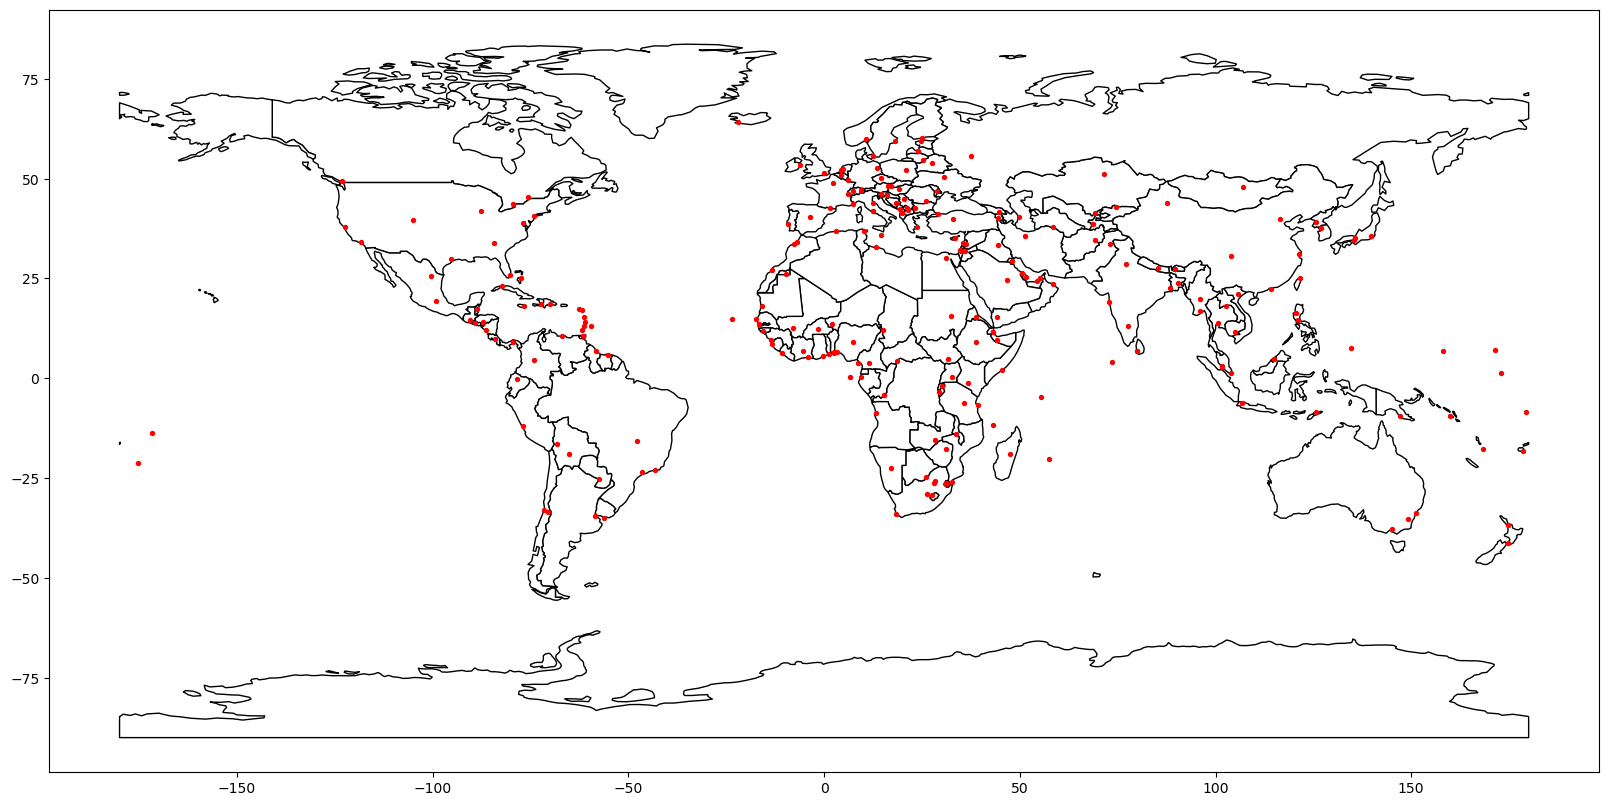

In [15]:
# Geodataframe de ciudades de Natural Earth
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Mapa base de países
base = paises.plot(color='white', edgecolor='black', figsize=(20, 20))

# Capa de ciudades
ciudades.plot(ax=base, marker='o', color='red', markersize=8)

#### Ejercicios

1. Descargue del [Sistema Nacional de Información Territorial (SNIT)](https://www.snitcr.go.cr/) las siguientes capas, en el CRS WGS84.

- Provincias ([https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/provincias.geojson](https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/provincias.geojson)).
- Cantones ([https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/cantones.geojson](https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/cantones.geojson)).
- Áreas silvestres protegidas (ASP) ([https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/sinac/asp.geojson](https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/sinac/asp.geojson)).
- Red vial (escala 1:200000) ([https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/red_vial.geojson](https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/ad72c01d38edc1ceb536fca3d4770a89c899410b/contenido/4/datos/ign/red_vial.geojson)).

2. Cargue cada capa en un geodataframe.
3. Examine la estructura y el contenido de cada conjunto de datos.
4. Despliegue algunos mapas para cada capa, utilizando las funciones de matplotlib y geopandas.
5. Genere mapas que presenten la capa de red vial con las otras tres.

## Ejemplo de análisis: distribución de murciélagos en ASP de Costa Rica

En los siguientes ejemplos, se utilizará un conjunto de registros de presencia de murciélagos (orden *Chiroptera*) de Costa Rica, en formato CSV, obtenido a través de una [consulta al portal de la Infraestructura de Información Mundial en Biodiversidad (GBIF)](https://doi.org/10.15468/dl.g5ce3g). También se utilizará la capa de ASP del Sistema Nacional de Áreas Protegidas de Costa Rica (Sinac).

Como resultado, se obtiene un mapa que muestra la cantida de especies de murciélagos en cada ASP.

### Carga de datos

#### Murciélagos

Ya que los archivos de valores separados por comas (CSV) no tienen un formato geoespacial (SHP, GPKG, GeoJSON u otro), los datos de murciélagos se cargan primero en un dataframe normal (i.e. sin geometrías).

In [16]:
# Carga de registros de presencia de murciélagos en un dataframe
murcielagos = pd.read_csv("datos/gbif/murcielagos.csv", sep="\t")

# Despliegue de los datos
murcielagos

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3925367874,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13766...,Animalia,Chordata,Mammalia,Chiroptera,Emballonuridae,Rhynchonycteris,Rhynchonycteris naso,...,weisswolf,2022-10-05T18:17:08,CC_BY_NC_4_0,weisswolf,weisswolf,NaN,NaN,2022-10-15T16:09:18.161Z,StillImage,COORDINATE_ROUNDED
1,3925294399,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13810...,Animalia,Chordata,Mammalia,Chiroptera,Emballonuridae,Rhynchonycteris,Rhynchonycteris naso,...,Scott Hodgdon,2022-10-09T12:52:01,CC_BY_NC_4_0,genz,genz,NaN,NaN,2022-10-15T16:07:56.890Z,StillImage,COORDINATE_ROUNDED
2,3925172153,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13792...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Uroderma,Uroderma bilobatum,...,botanicalpilot,2022-10-08T00:34:04,CC_BY_NC_4_0,botanicalpilot,botanicalpilot,NaN,NaN,2022-10-15T15:36:33.801Z,StillImage,COORDINATE_ROUNDED
3,3923672667,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13757...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Ectophylla,Ectophylla alba,...,sergiovillegas,2022-10-04T21:25:33,CC_BY_NC_4_0,sergiovillegas,sergiovillegas,NaN,NaN,2022-10-15T15:36:33.091Z,StillImage,COORDINATE_ROUNDED
4,3923593058,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13700...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Ectophylla,Ectophylla alba,...,Katharina Miller,2022-09-30T09:20:18,CC_BY_NC_4_0,Katharina Miller,Katharina Miller,NaN,NaN,2022-10-15T15:46:30.036Z,StillImage,COORDINATE_ROUNDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,45849434,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12726,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.251Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13466,45849433,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12725,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.249Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13467,45849432,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12724,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.251Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13468,45849431,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12723,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.250Z,NaN,INSTITUTION_COLLECTION_MISMATCH


Luego, con el método [geopandas.points_from_xy()](https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html), se crea una columna de geometrías de puntos, con base en las columnas `decimalLongitude` y `decimalLatitude`.

In [17]:
# Geodataframe creado a partir del dataframe
murcielagos = gpd.GeoDataFrame(murcielagos, 
                               geometry=gpd.points_from_xy(murcielagos.decimalLongitude, 
                                                           murcielagos.decimalLatitude),
                               crs="EPSG:4326")

# Despliegue de los datos (incluyendo geometrías)
murcielagos

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
0,3925367874,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13766...,Animalia,Chordata,Mammalia,Chiroptera,Emballonuridae,Rhynchonycteris,Rhynchonycteris naso,...,2022-10-05T18:17:08,CC_BY_NC_4_0,weisswolf,weisswolf,NaN,NaN,2022-10-15T16:09:18.161Z,StillImage,COORDINATE_ROUNDED,POINT (-83.46987 8.87901)
1,3925294399,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13810...,Animalia,Chordata,Mammalia,Chiroptera,Emballonuridae,Rhynchonycteris,Rhynchonycteris naso,...,2022-10-09T12:52:01,CC_BY_NC_4_0,genz,genz,NaN,NaN,2022-10-15T16:07:56.890Z,StillImage,COORDINATE_ROUNDED,POINT (-84.48173 10.48954)
2,3925172153,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13792...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Uroderma,Uroderma bilobatum,...,2022-10-08T00:34:04,CC_BY_NC_4_0,botanicalpilot,botanicalpilot,NaN,NaN,2022-10-15T15:36:33.801Z,StillImage,COORDINATE_ROUNDED,POINT (-84.14411 9.38935)
3,3923672667,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13757...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Ectophylla,Ectophylla alba,...,2022-10-04T21:25:33,CC_BY_NC_4_0,sergiovillegas,sergiovillegas,NaN,NaN,2022-10-15T15:36:33.091Z,StillImage,COORDINATE_ROUNDED,POINT (-84.04603 10.41495)
4,3923593058,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/13700...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Ectophylla,Ectophylla alba,...,2022-09-30T09:20:18,CC_BY_NC_4_0,Katharina Miller,Katharina Miller,NaN,NaN,2022-10-15T15:46:30.036Z,StillImage,COORDINATE_ROUNDED,POINT (-84.19692 10.58924)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,45849434,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12726,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.251Z,NaN,INSTITUTION_COLLECTION_MISMATCH,POINT (-84.05000 9.95000)
13466,45849433,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12725,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.249Z,NaN,INSTITUTION_COLLECTION_MISMATCH,POINT (-84.05000 9.95000)
13467,45849432,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12724,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.251Z,NaN,INSTITUTION_COLLECTION_MISMATCH,POINT (-84.05000 9.95000)
13468,45849431,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12723,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,Native,2022-09-09T07:01:20.250Z,NaN,INSTITUTION_COLLECTION_MISMATCH,POINT (-84.05000 9.95000)


Ahora que los datos de murciélagos están en un geodataframe, pueden desplegarse en un mapa.

<Axes: >

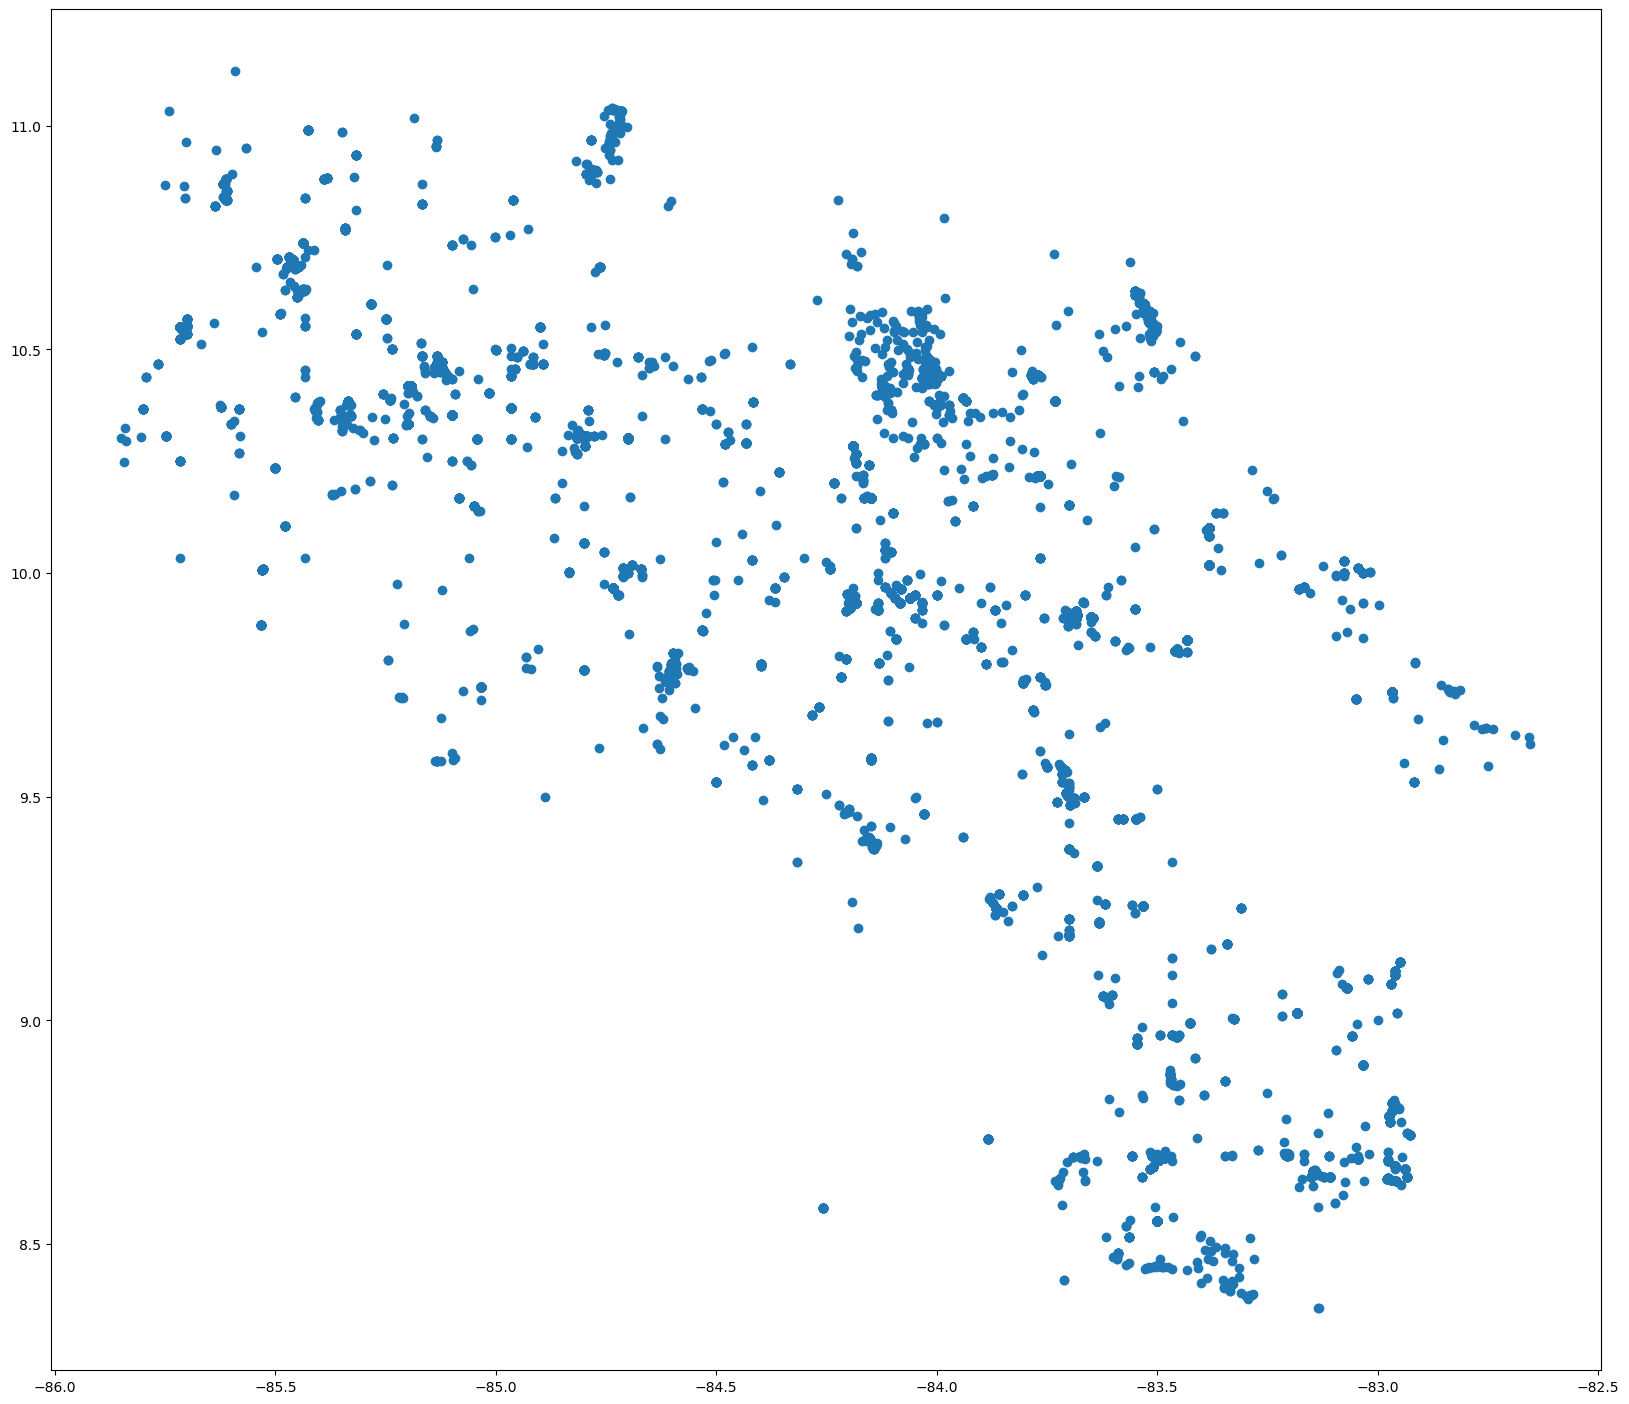

In [18]:
# Mapa
murcielagos.plot(figsize=(20, 20))

#### Áreas silvestres protegidas (ASP)

Como los datos de ASP sí están en un formato geoespacial (ej. GeoJSON), pueden cargarse directamente en un geodataframe.

In [19]:
# Carga de polígonos de ASP
asp = gpd.read_file("datos/sinac/asp.geojson", sep="\t")

# Despliegue tabular de los datos
asp

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,...,area_km_2,version_2,area_hecta,grupo,begin,end,area_3,ha_2,sector,geometry
0,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1985,DE_16614_MAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.64798 9.63982, -82.64790 9.63975..."
1,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area marina protegida,1985,DE_16614_MAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.70297 9.66306, -82.70103 9.66254..."
2,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area marina protegida,1970,DE_1236-A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.62743 9.81309, -82.78927 9.67376..."
3,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1970,DE_1236-A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.81154 9.73568, -82.81160 9.73563..."
4,B09,Bicentenario de la República - Pájaro Campana,Reserva Biologica,Estatal,RB,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,2021,DE_42615_MINAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.77351 8.94507, -82.81050 8.95856..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Area marina protegida,1966,Ley_3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.66202 10.73569, -85.66240 10.735..."
170,P07,Marino las Baulas de Guanacaste,Parque Nacional,Estatal,PN,Area de Conservacion Tempisque,ACT,Area marina protegida,1991,DE_20518_MIRENEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.86542 10.34860, -85.86536 10.348..."
171,P20,Isla del Coco,Parque Nacional,Estatal,PN,Marina Cocos,ACMC,Isla,1978,DE_ 8748_A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-87.04703 5.55545, -87.04703 5.55491..."
172,P20,Isla del Coco,Parque Nacional,Estatal,PN,Marina Cocos,ACMC,Area marina protegida,2022,DE-43368-MINAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-86.36701 4.52901, -88.98701 4.52902..."


<Axes: >

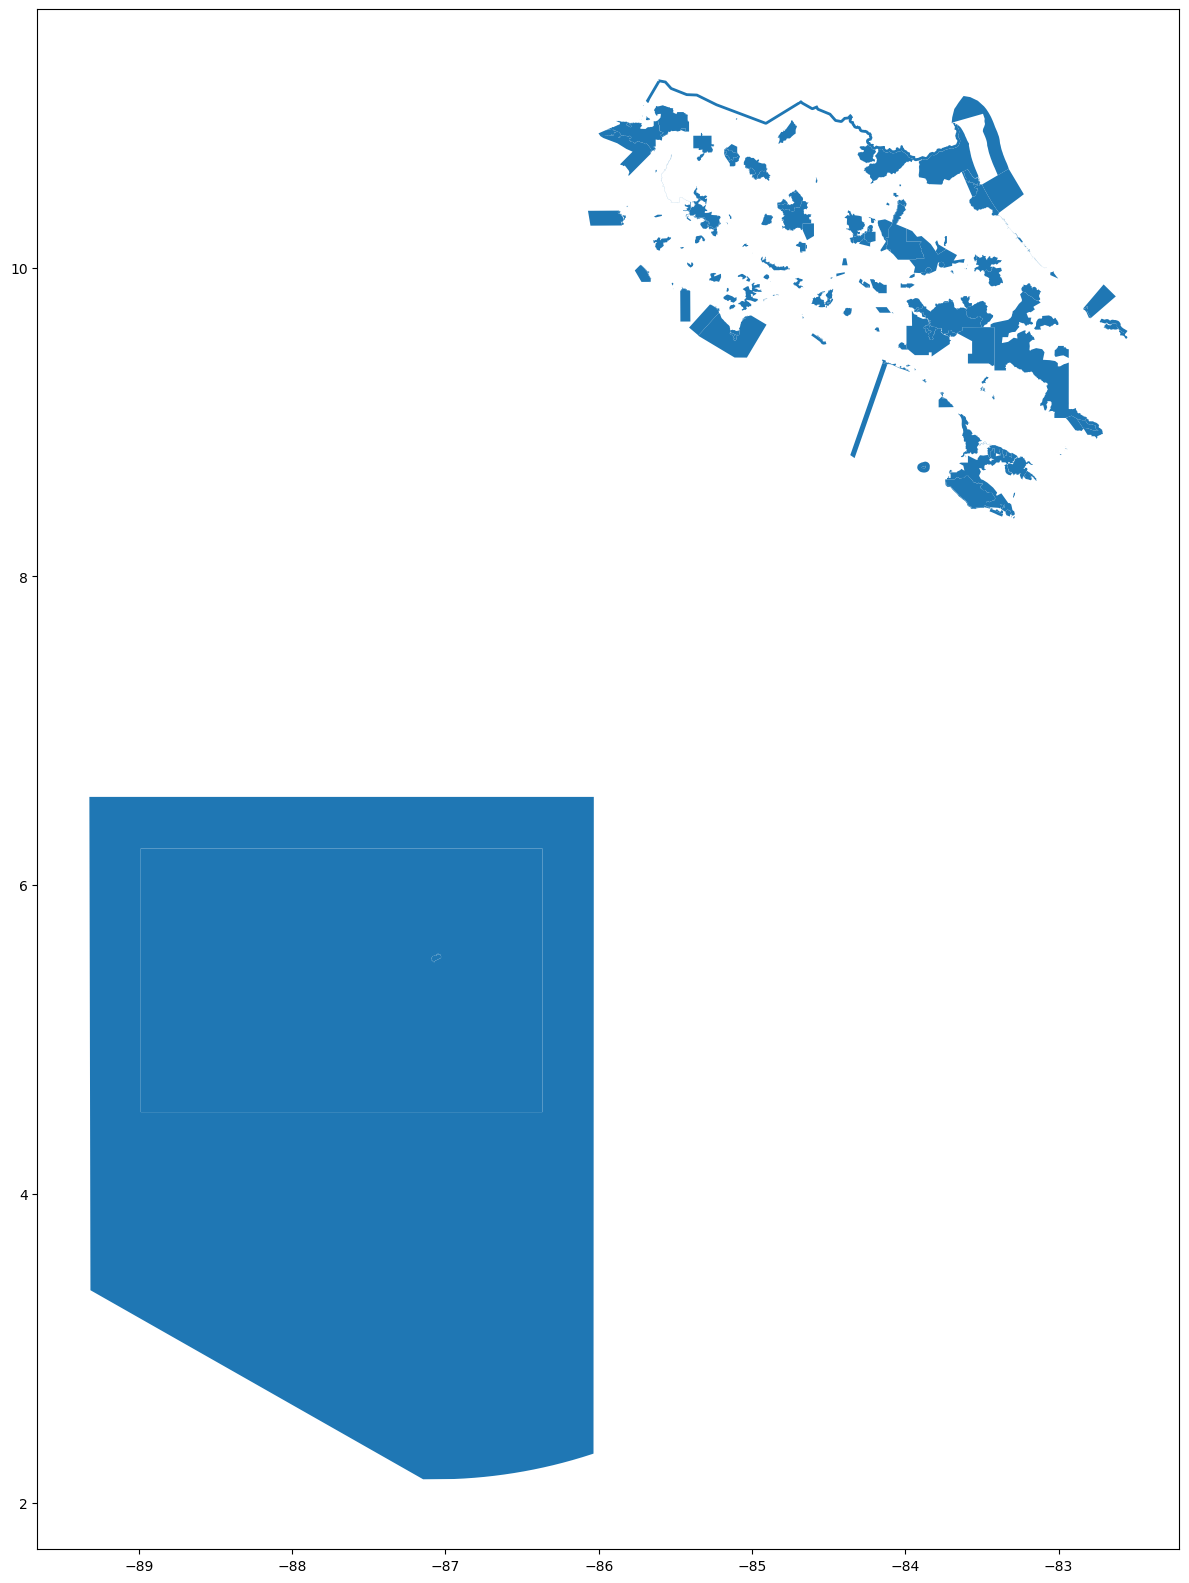

In [20]:
# Mapa de ASP
asp.plot(figsize=(20, 20))

Ahora, ambas capas pueden mostrarse en un mismo mapa.

<Axes: >

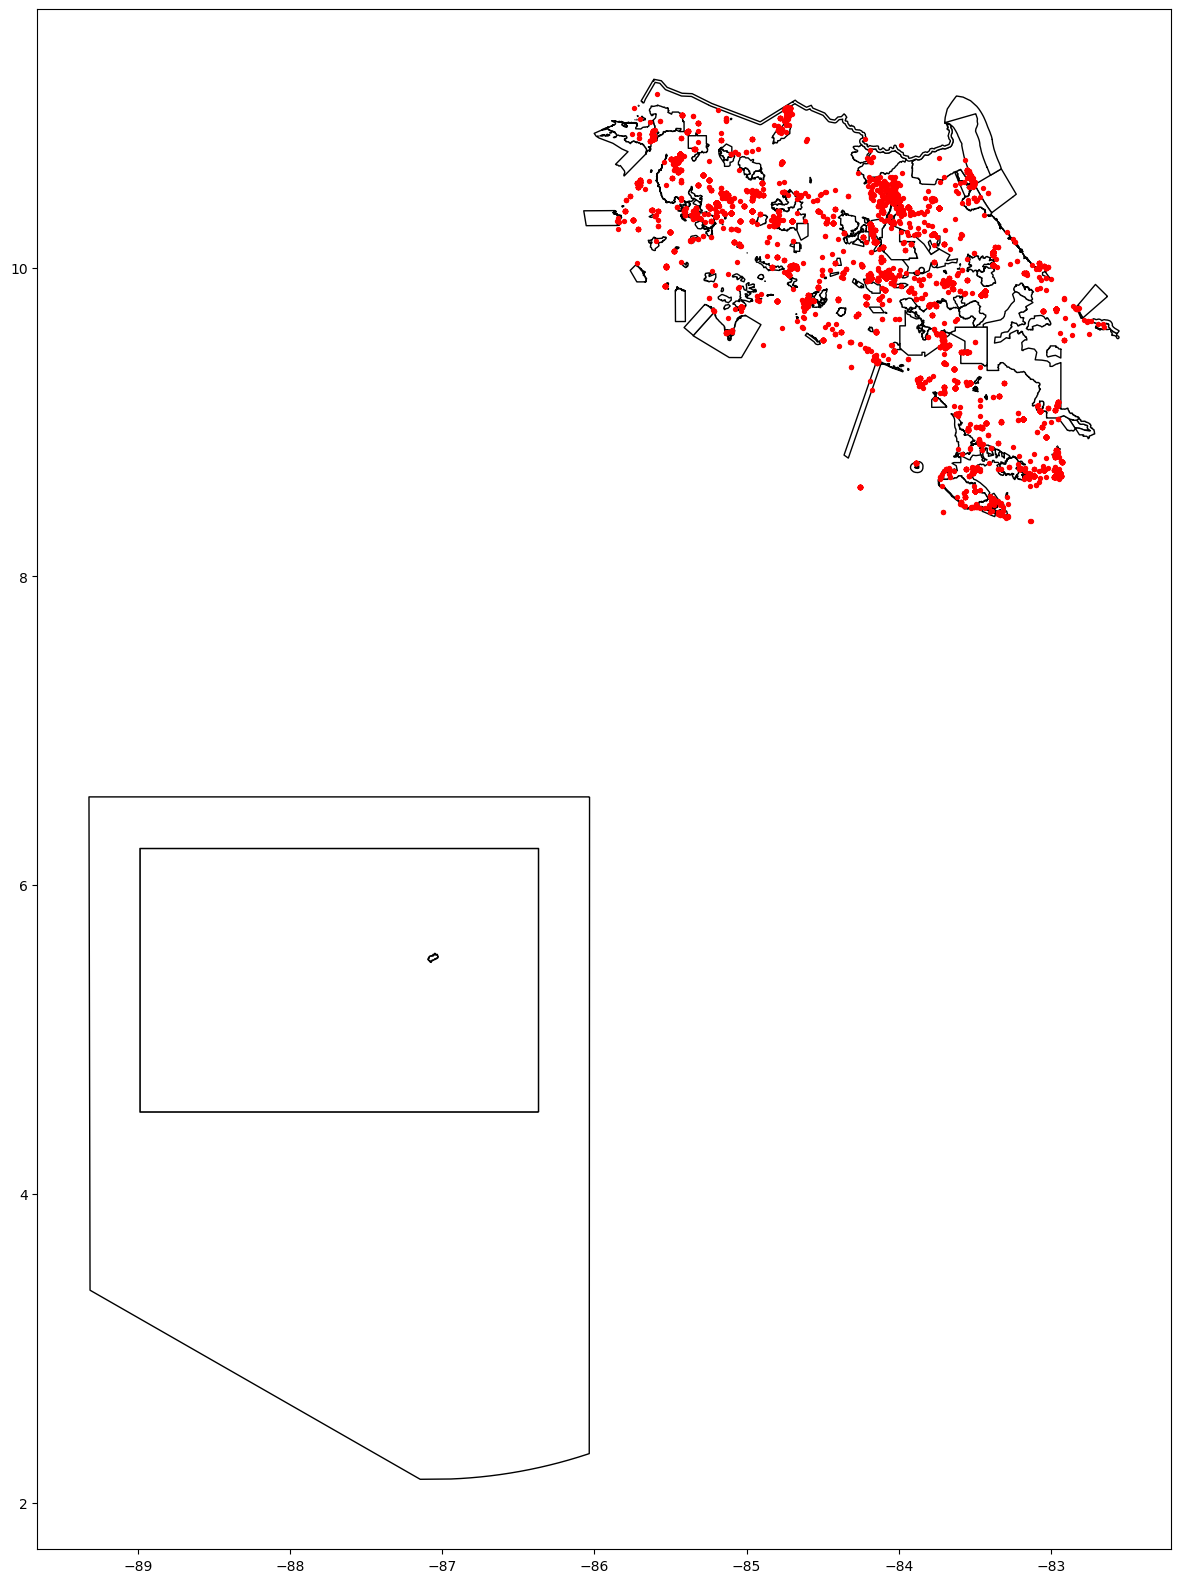

In [21]:
# Capa base de países
base = asp.plot(color='white', edgecolor='black', figsize=(20, 20))

# Capa de murciélagos
murcielagos.plot(ax=base, marker='o', color='red', markersize=8)

### Conteo de especies en cada ASP

Con el método [geopandas.sjoin()](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html), se realiza una [unión espacial o *spatial join*](https://gisgeography.com/spatial-join/) de las tablas de ASP y de murciélagos. Esto produce un geodataframe con una fila por cada registro de murciélagos, la cual contiene también la información del ASP en donde se ubica el registro. 

En este caso, se conservan solo las filas en donde hay intersección de las geometrías de ambas tablas. O sea, aquellos registros de murciélagos que se ubican en un ASP. Se excluyen los registros ubicados fuera de las ASP.

In [22]:
# Join espacial de las capas de ASP y murciélagos
asp_murcielagos = asp.sjoin(murcielagos)

asp_murcielagos

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1985,DE_16614_MAG,...,Jakob Fahr,2020-10-30T18:48:10,CC_BY_NC_4_0,Cameron Eckert,Cameron Eckert,NaN,NaN,2022-10-15T15:19:51.786Z,StillImage,COORDINATE_ROUNDED
0,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1985,DE_16614_MAG,...,Ryan Shofner,2020-08-15T04:01:47,CC_BY_NC_4_0,Ryan Shofner,Ryan Shofner,NaN,NaN,2022-10-15T15:16:49.656Z,StillImage,COORDINATE_ROUNDED
3,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1970,DE_1236-A,...,Luis F. Aguirre,2014-06-30T19:11:41,CC_BY_NC_4_0,Trent Pearce,Trent Pearce,NaN,NaN,2022-10-15T15:36:13.557Z,NaN,NaN
3,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1970,DE_1236-A,...,NaN,NaN,CC_BY_NC_4_0,Stichting Observation International,NaN,NaN,NaN,2022-09-15T16:35:50.269Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
3,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1970,DE_1236-A,...,NaN,NaN,CC_BY_NC_4_0,Stichting Observation International,NaN,NaN,NaN,2022-09-15T16:35:13.840Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Area terrestre protegida,1966,Ley_3694,...,Madeleine Mullon,2020-10-22T00:00:00,CC_BY_NC_4_0,President and Fellows of Harvard College,Judith Marie Chupasko,NaN,NaN,2022-10-20T12:41:27.078Z,NaN,COORDINATE_ROUNDED;INSTITUTION_MATCH_FUZZY;COL...
167,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Area terrestre protegida,1966,Ley_3694,...,Judith Marie Chupasko,2002-01-07T00:00:00,CC_BY_NC_4_0,President and Fellows of Harvard College,Judith Marie Chupasko,NaN,NaN,2022-10-20T12:41:09.347Z,NaN,COORDINATE_ROUNDED;INSTITUTION_MATCH_FUZZY;COL...
167,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Area terrestre protegida,1966,Ley_3694,...,Jakob Fahr,2022-02-22T15:15:09,CC_BY_NC_4_0,iprabhu,iprabhu,NaN,NaN,2022-10-15T15:31:05.696Z,StillImage,COORDINATE_ROUNDED
170,P07,Marino las Baulas de Guanacaste,Parque Nacional,Estatal,PN,Area de Conservacion Tempisque,ACT,Area marina protegida,1991,DE_20518_MIRENEM,...,NaN,NaN,CC0_1_0,NaN,USACR,NaN,Native,2022-09-08T23:55:59.749Z,NaN,COORDINATE_REPROJECTED;COLLECTION_MATCH_FUZZY


In [23]:
# Estructura
asp_murcielagos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2333 entries, 0 to 170
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   codigo                            2333 non-null   object  
 1   nombre_asp                        2333 non-null   object  
 2   cat_manejo                        2333 non-null   object  
 3   estatus                           2333 non-null   object  
 4   siglas_cat                        2333 non-null   object  
 5   nombre_ac                         2333 non-null   object  
 6   siglas_ac                         2333 non-null   object  
 7   descripcio                        2333 non-null   object  
 8   a_creacion                        2333 non-null   int64   
 9   n_creacion                        2333 non-null   object  
 10  area                              2333 non-null   float64 
 11  area_km                           2333 non-null   floa

<Axes: >

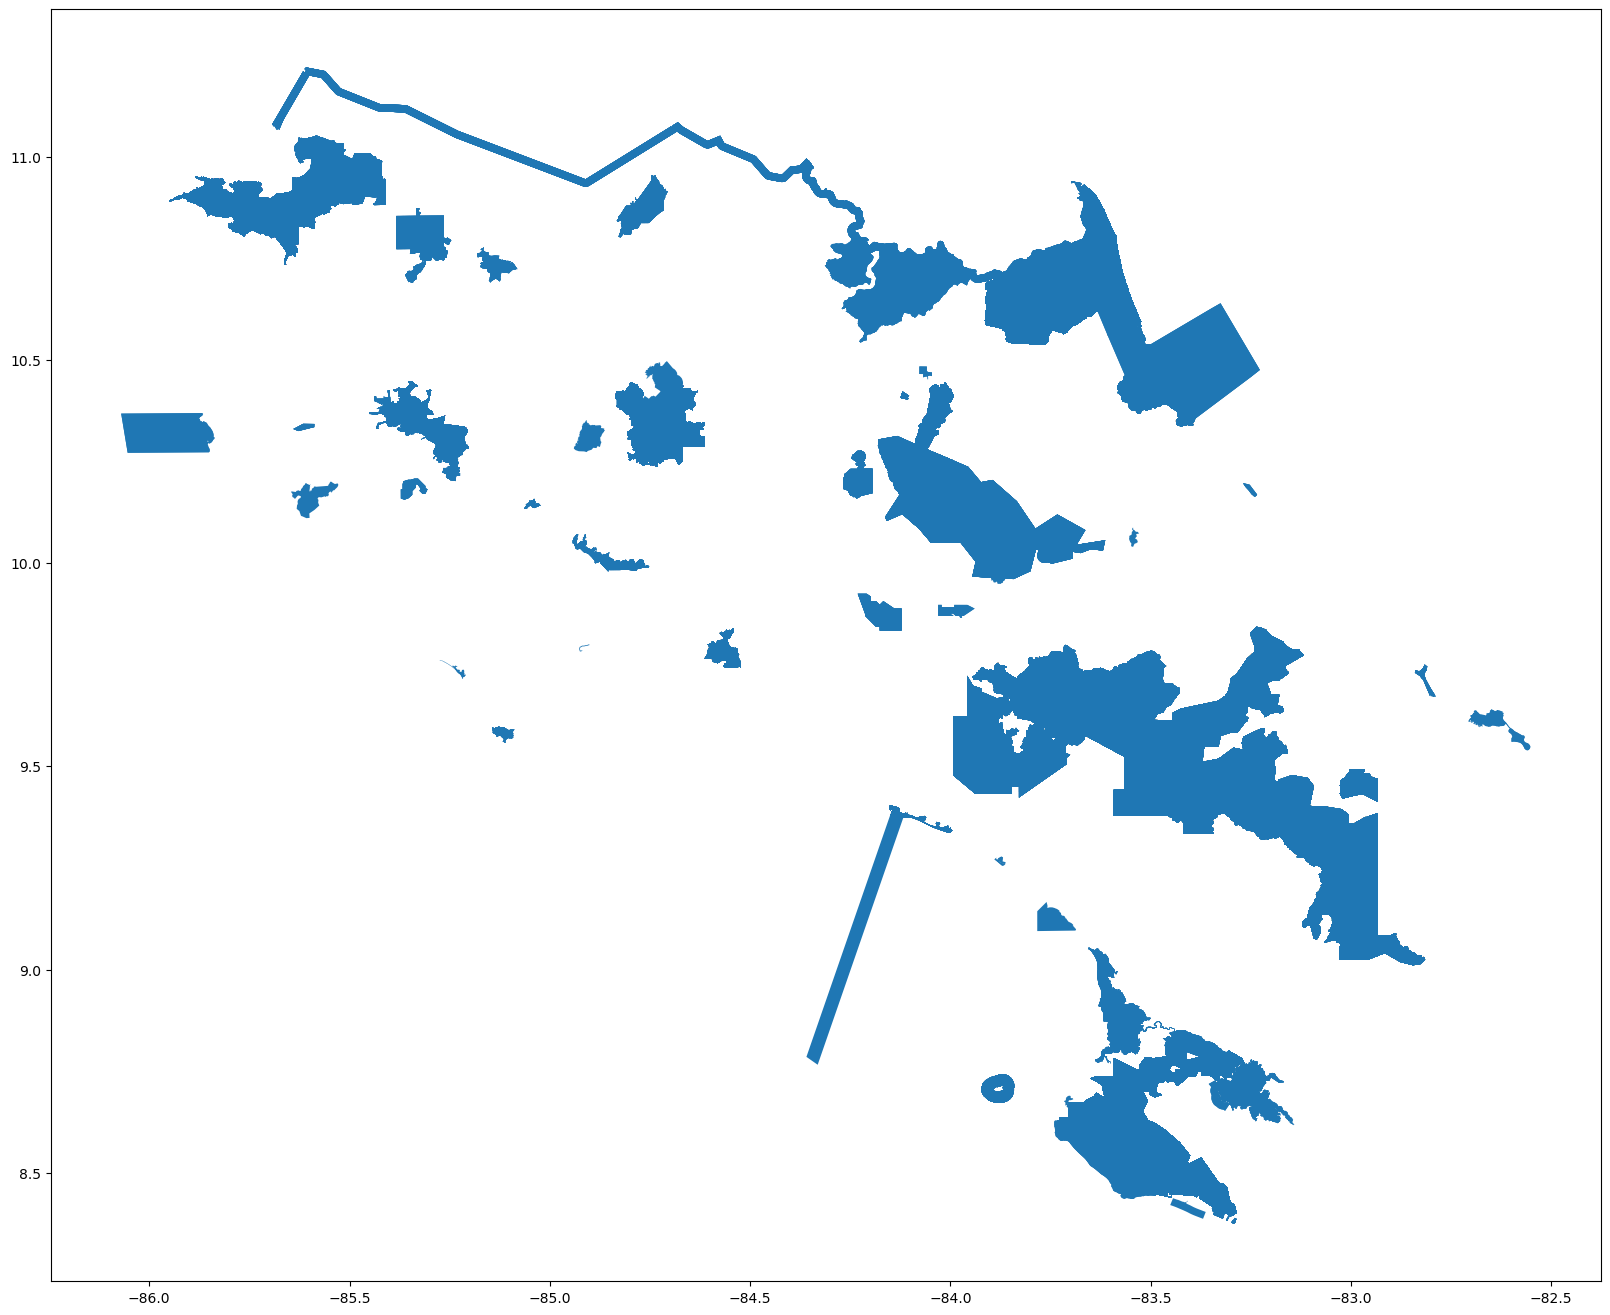

In [24]:
# Mapa de ASP en las que hay registros de murciélagos
asp_murcielagos.plot(figsize=(20, 20))

Seguidamente, se cuenta la cantidad de especies que hay en cada ASP.

In [25]:
# Conteo de especies en cada ASP
conteo_asp_especies = asp_murcielagos.groupby("nombre_asp").species.nunique()
conteo_asp_especies = conteo_asp_especies.reset_index() # para convertir la serie a dataframe

# Cambio de nombre de columna
conteo_asp_especies.rename(columns = {'species': 'especies'}, inplace = True)

# Despliegue de ASP por cantidad de especies
conteo_asp_especies.sort_values(by="especies", ascending=False)

,nombre_asp,especies
27,Golfo Dulce,54
1,Arenal Monteverde,32
45,Palo Verde,30
15,Corcovado,28
3,Barra del Colorado,27
34,La Selva,27
51,Santa Rosa,18
4,Braulio Carrillo,17
52,Tapanti-Macizo de la Muerte,15
54,Tortuguero,12


El método [pandas.DataFrame.join()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) se usa seguidamente para unir el geodataframe de ASP con el dataframe que contiene el conteo de especies por ASP. Como resultado, el geodataframe de ASP tiene ahora la columna con la cantidad de especies.

In [26]:
# Join para agregar la columna con el conteo a la capa de ASP
asp_especies = asp.join(conteo_asp_especies.set_index('nombre_asp'), on='nombre_asp')
asp_especies

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,...,version_2,area_hecta,grupo,begin,end,area_3,ha_2,sector,geometry,especies
0,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1985,DE_16614_MAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.64798 9.63982, -82.64790 9.63975...",2.0
1,V03,Gandoca Manzanillo,Refugio Nacional de Vida Silvestre,Mixto,RNVS,Area de Conservacion La Amistad Caribe,ACLAC,Area marina protegida,1985,DE_16614_MAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.70297 9.66306, -82.70103 9.66254...",2.0
2,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area marina protegida,1970,DE_1236-A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.62743 9.81309, -82.78927 9.67376...",4.0
3,P16,Cahuita,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Caribe,ACLAC,Area terrestre protegida,1970,DE_1236-A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.81154 9.73568, -82.81160 9.73563...",4.0
4,B09,Bicentenario de la República - Pájaro Campana,Reserva Biologica,Estatal,RB,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,2021,DE_42615_MINAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.77351 8.94507, -82.81050 8.95856...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Area marina protegida,1966,Ley_3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.66202 10.73569, -85.66240 10.735...",18.0
170,P07,Marino las Baulas de Guanacaste,Parque Nacional,Estatal,PN,Area de Conservacion Tempisque,ACT,Area marina protegida,1991,DE_20518_MIRENEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.86542 10.34860, -85.86536 10.348...",2.0
171,P20,Isla del Coco,Parque Nacional,Estatal,PN,Marina Cocos,ACMC,Isla,1978,DE_ 8748_A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-87.04703 5.55545, -87.04703 5.55491...",NaN
172,P20,Isla del Coco,Parque Nacional,Estatal,PN,Marina Cocos,ACMC,Area marina protegida,2022,DE-43368-MINAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-86.36701 4.52901, -88.98701 4.52902...",NaN


<Axes: >

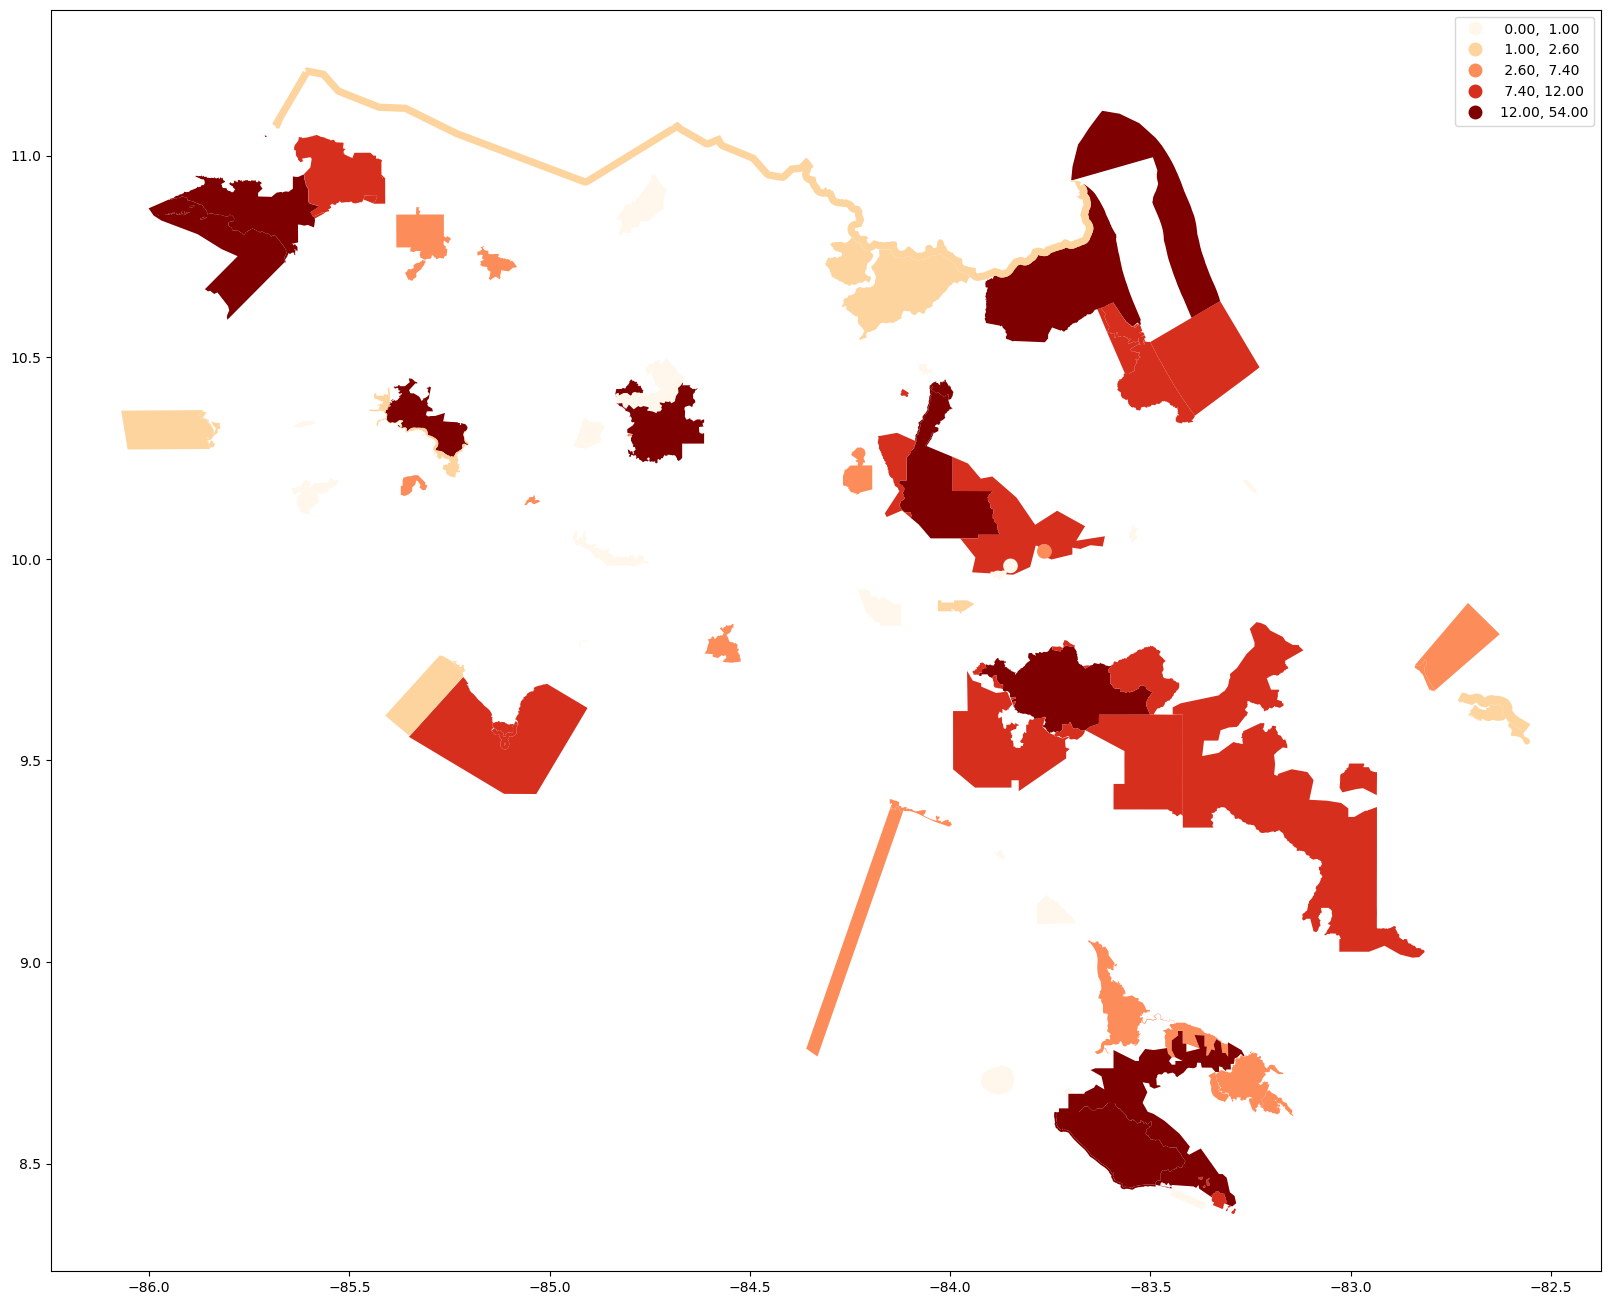

In [27]:
# Mapeo
asp_especies.plot(column="especies", 
            legend=True,
            cmap='OrRd', 
            scheme='quantiles',
            figsize=(20, 20)
            )

## Ejercicios

Desarrolle los siguientes mapas, primero en QGIS y luego en Python con las funciones de la biblioteca GeoPandas.

1. Mapa de coropletas que muestre la cantidad de casos positivos de COVID en cantones de Costa Rica.
2. Mapa de coropletas que muestre la cantidad de casos positivos de COVID en provincias de Costa Rica.

3. Mapa de coropletas que muestre la cantidad de especies de murciélagos en cantones de Costa Rica.
4. Mapa de coropletas que muestre la cantidad de especies de murciélagos en provincias de Costa Rica.

5. Mapa de coropletas que muestre la densidad de la red vial ( * ) en cantones de Costa Rica ( ** ).
6. Mapa de coropletas que muestre la densidad de la red vial ( * ) en provincias de Costa Rica.

Además de los mapas, visualice los resultados en tablas y gráficos, cuando le ayuden a verificar o comprender mejor el problema a resolver.

( * ) La densidad de la red vial para un polígono se define como:  
**km de longitud de red vial / km2 de área**  
Por ejemplo, si un cantón tiene 500 km de longitud de red vial y un área de 1000 km2, la densidad de su red vial es 0.5.

( ** ) Puede encontrar una solución al problema del cálculo de la densidad de la red vial en [https://github.com/gf0657-programacionsig/2022-ii-densidad-redvial](https://github.com/gf0657-programacionsig/2022-ii-densidad-redvial).

## Recursos de interés

**Unión (*join*) de datos**
- [How To Think Spatially with Spatial Relationships](https://gisgeography.com/spatial-relationships/)
- [GeoPandas - Merging Data](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html)
- [Geopandas - Spatial Joins](https://geopandas.org/en/stable/gallery/spatial_joins.html)

**Agrupación de datos**
- [pandas GroupBy: Your Guide to Grouping Data in Python](https://realpython.com/pandas-groupby/)
- [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

**Superposición (*overlay*) de datos**  
- [geopandas.overlay](https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html)